In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.shape

(2535, 14)

# 1. Box plot of age in both genders seperated by manner of death

In [7]:
kill.manner_of_death.nunique()

2

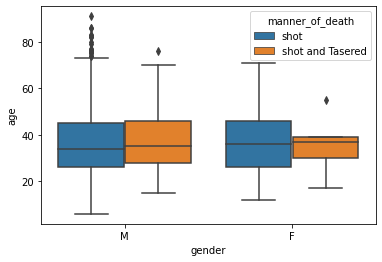

In [9]:
sns.boxplot(x='gender', y='age', hue='manner_of_death', data=kill);

<AxesSubplot:xlabel='gender', ylabel='age'>

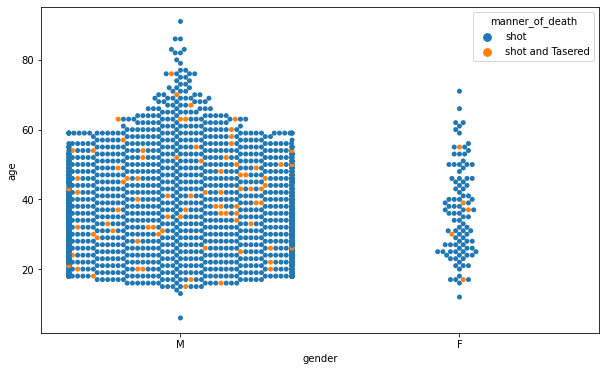

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.swarmplot(x='gender', y='age', hue='manner_of_death', data=kill)

# 2. Plot 12 most dangerous cities

### Barplot

In [16]:
city_freq = kill.city.value_counts()[:12]

In [17]:
city_freq

Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Miami           18
Austin          18
St. Louis       15
Tucson          14
Indianapolis    14
Name: city, dtype: int64

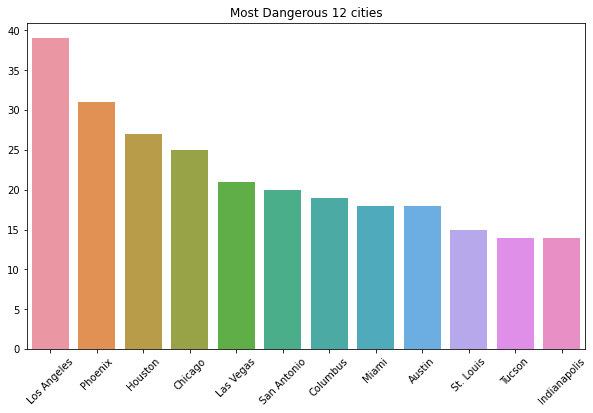

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=city_freq.index, y=city_freq.values)

ax.set_xticklabels(city_freq.index, rotation=45)

ax.set_title('Most Dangerous 12 cities');

### Countplot

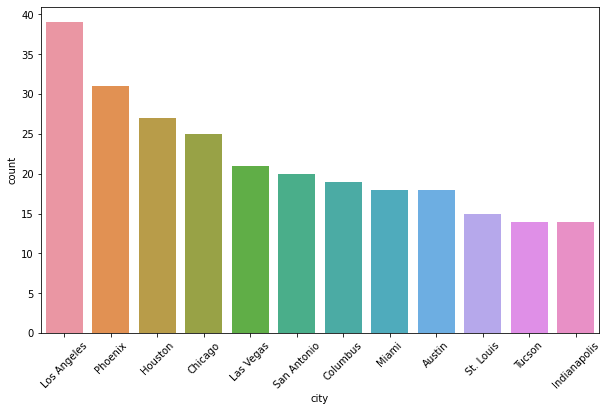

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='city', data=kill, order=city_freq.index)

ax.set_xticklabels(city_freq.index, rotation=45);

# Plot 20 most dangerous states

In [29]:
state_freq = kill.state.value_counts()[:20]

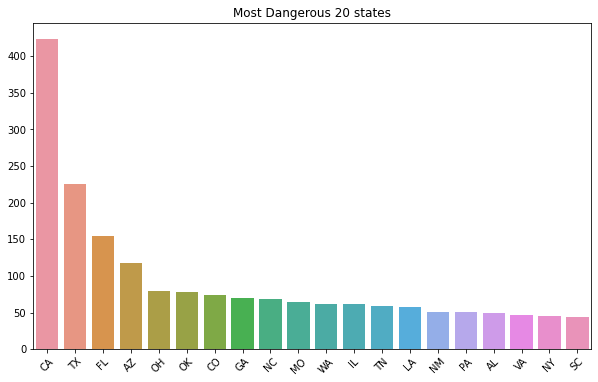

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=state_freq.index, y=state_freq.values)

ax.set_xticklabels(state_freq.index, rotation=45)

ax.set_title('Most Dangerous 20 states');

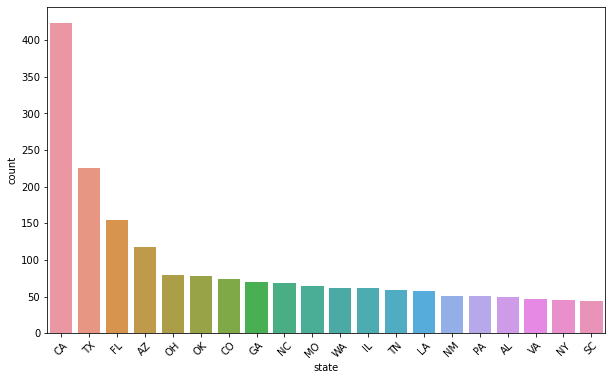

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='state', data=kill, order=state_freq.index)

ax.set_xticklabels(state_freq.index, rotation=45);

# 4. Plot having mental illness or not for killed people

In [38]:
somi = kill.signs_of_mental_illness.value_counts()

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

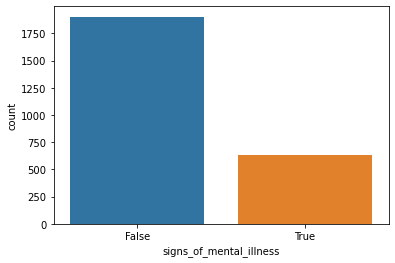

In [39]:
sns.countplot(kill.signs_of_mental_illness)

<AxesSubplot:>

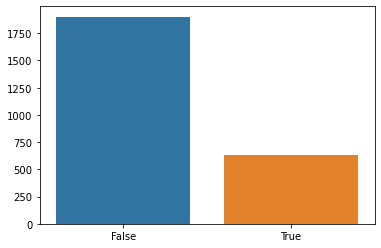

In [40]:
sns.barplot(x=somi.index, y=somi.values)

# 5. Plot number of threat types

In [44]:
threat = kill.threat_level.value_counts()

<AxesSubplot:xlabel='threat_level', ylabel='count'>

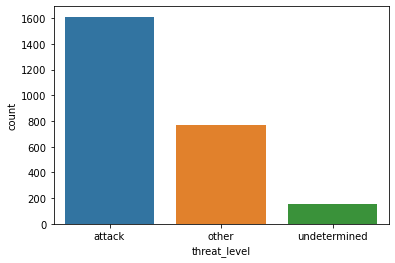

In [43]:
sns.countplot(kill.threat_level)

<AxesSubplot:>

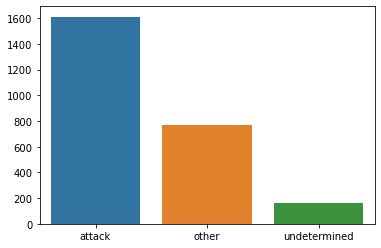

In [45]:
sns.barplot(threat.index, threat.values)

# 6. Plot number of flee types

In [48]:
flee_type = kill.flee.value_counts()

<AxesSubplot:xlabel='flee', ylabel='count'>

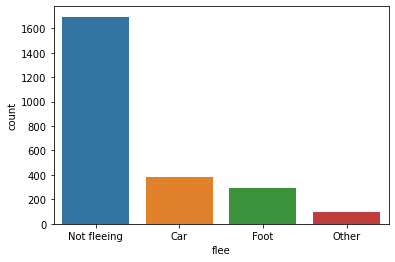

In [47]:
sns.countplot(kill.flee)

<AxesSubplot:>

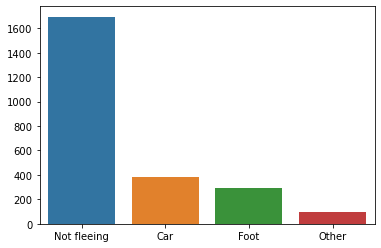

In [49]:
sns.barplot(flee_type.index, flee_type.values)